# Ranking Algorithm using Markov Chain

In [1]:
import pandas as pd
import numpy as np

In [2]:
input_data = pd.read_csv('my_data/CFB2018_scores.csv',header=None)
input_data = input_data.rename(columns = {0:'A_index', 1:'A_points', 2:'B_index', 3:'B_points'})

In [3]:
names = pd.read_table('my_data/TeamNames.txt',header=None)
names = names.rename(columns={0:'Team_Names'})

In [4]:
M_matrix = np.zeros((767,767))

In [5]:
input_data['A_index'] = input_data['A_index'] - 1
input_data['B_index'] = input_data['B_index'] - 1

In [6]:
for index, row in input_data.iterrows():
    i = row['A_index']
    j = row['B_index']
    points_tot = row['A_points'] + row['B_points']
    points_i = row['A_points']
    points_j = row['B_points']
    
    if points_i > points_j:
        M_matrix[i,i] = M_matrix[i,i] + (points_i/points_tot) + 1
        M_matrix[j,i] = M_matrix[j,i] + (points_i/points_tot) + 1
        M_matrix[i,j] = M_matrix[i,j] + (points_j/points_tot) + 0
        M_matrix[j,j] = M_matrix[j,j] + (points_j/points_tot) + 0
        
    if points_j > points_i:
        M_matrix[j,j] = M_matrix[j,j] + (points_j/points_tot) + 1
        M_matrix[i,j] = M_matrix[i,j] + (points_j/points_tot) + 1
        M_matrix[j,i] = M_matrix[j,i] + (points_i/points_tot) + 0
        M_matrix[i,i] = M_matrix[i,i] + (points_i/points_tot) + 0
        
    

In [15]:
M_matrix_norm = M_matrix/np.sum(M_matrix,axis=1)

array([[0.53903457, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.37886441, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.46198924, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.49844282, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.5105451 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.41617174]])

In [8]:
w = np.full((1,767),1/767)

In [9]:

def run_rand_walk(df,t,w):
    for i in range(0,t):
        w = np.matmul(w,M_matrix_norm)
    top_25 = np.flip(w.argsort())[0][:25]
    col_weights = 'weights_'+str(t)
    col_weights = w[0][list(top_25)]
    col_team = 'teams_'+str(t)
    col_team = names['Team_Names'][top_25]
    df['teams_'+str(t)] = list(col_team)
    df['weights_'+str(t)] = list(col_weights)
    return df

## Dataframe displaying teams and rankings for 10, 100 and 1000 iterations

In [10]:
df = pd.DataFrame()
for t in [10,100,1000,10000]:
    df = run_rand_walk(df,t,w)
df

,teams_10,weights_10,teams_100,weights_100,teams_1000,weights_1000,teams_10000,weights_10000
0,Mary Hardin-Baylor,0.012473,Mary Hardin-Baylor,0.041446,Clemson,0.071726,Clemson,0.076171
1,Clemson,0.011623,Clemson,0.037715,Alabama,0.039529,Alabama,0.041959
2,Mount Union,0.008602,Alabama,0.021010,Notre Dame,0.018982,Notre Dame,0.020134
3,North Dakota St,0.008430,Mount Union,0.014581,Georgia,0.018301,Georgia,0.019417
4,Valdosta St,0.008179,St John's MN,0.011506,Ohio State,0.017828,Ohio State,0.018898
5,Alabama,0.008174,Notre Dame,0.010300,Oklahoma,0.015082,Oklahoma,0.015989
6,Morningside,0.008171,Valdosta St,0.010010,Texas A&M,0.014086,Texas A&M,0.014949
7,St John's MN,0.007834,Georgia,0.009816,LSU,0.012876,LSU,0.013659
8,UW-Whitewater,0.007716,Ohio State,0.009792,Florida,0.012791,Florida,0.013567
9,Princeton,0.007178,Morningside,0.009424,Kentucky,0.012183,Kentucky,0.012925


In [16]:
from numpy.linalg import eig
a,b = eig(np.transpose(M_matrix_norm))

In [17]:
eig_val = np.argmax(a)
eig_vec = b[:,eig_val]

In [18]:
w_infinity = eig_vec/np.sum(eig_vec)

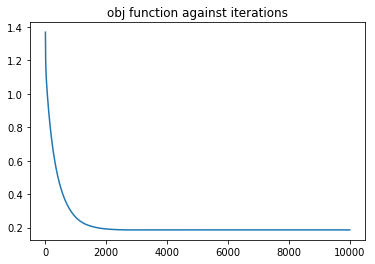

In [23]:
import matplotlib.pyplot as plt

w = np.full((1,767),1/767)
res = []
for t in range(0,10000):
    w = np.matmul(w,M_matrix_norm)
    res.append(np.sum(np.absolute(w - w_infinity)))

plt.plot(range(0,10000),res)
plt.title("obj function against iterations")
plt.show()